In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import random
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array,load_img

In [2]:
def load_rand():
    X=[]
    dir_path='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/train'
    for sub_dir in tqdm(os.listdir(dir_path)): #tdqm btred esem l folder bl directory path li mawjoudin bl train
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img=cv2.imread(os.path.join(path_main,img_name))
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X

In [3]:
images_arr=np.array(load_rand())
images_arr.shape

100%|██████████| 6/6 [00:02<00:00,  2.10it/s]


(36, 100, 100, 3)

# Displaying 36 Images (6 from each class) from the dataset

In [5]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['rottenbanana','freshoranges','rottenoranges', 'freshbanana', 'rottenapples',   'freshapples']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

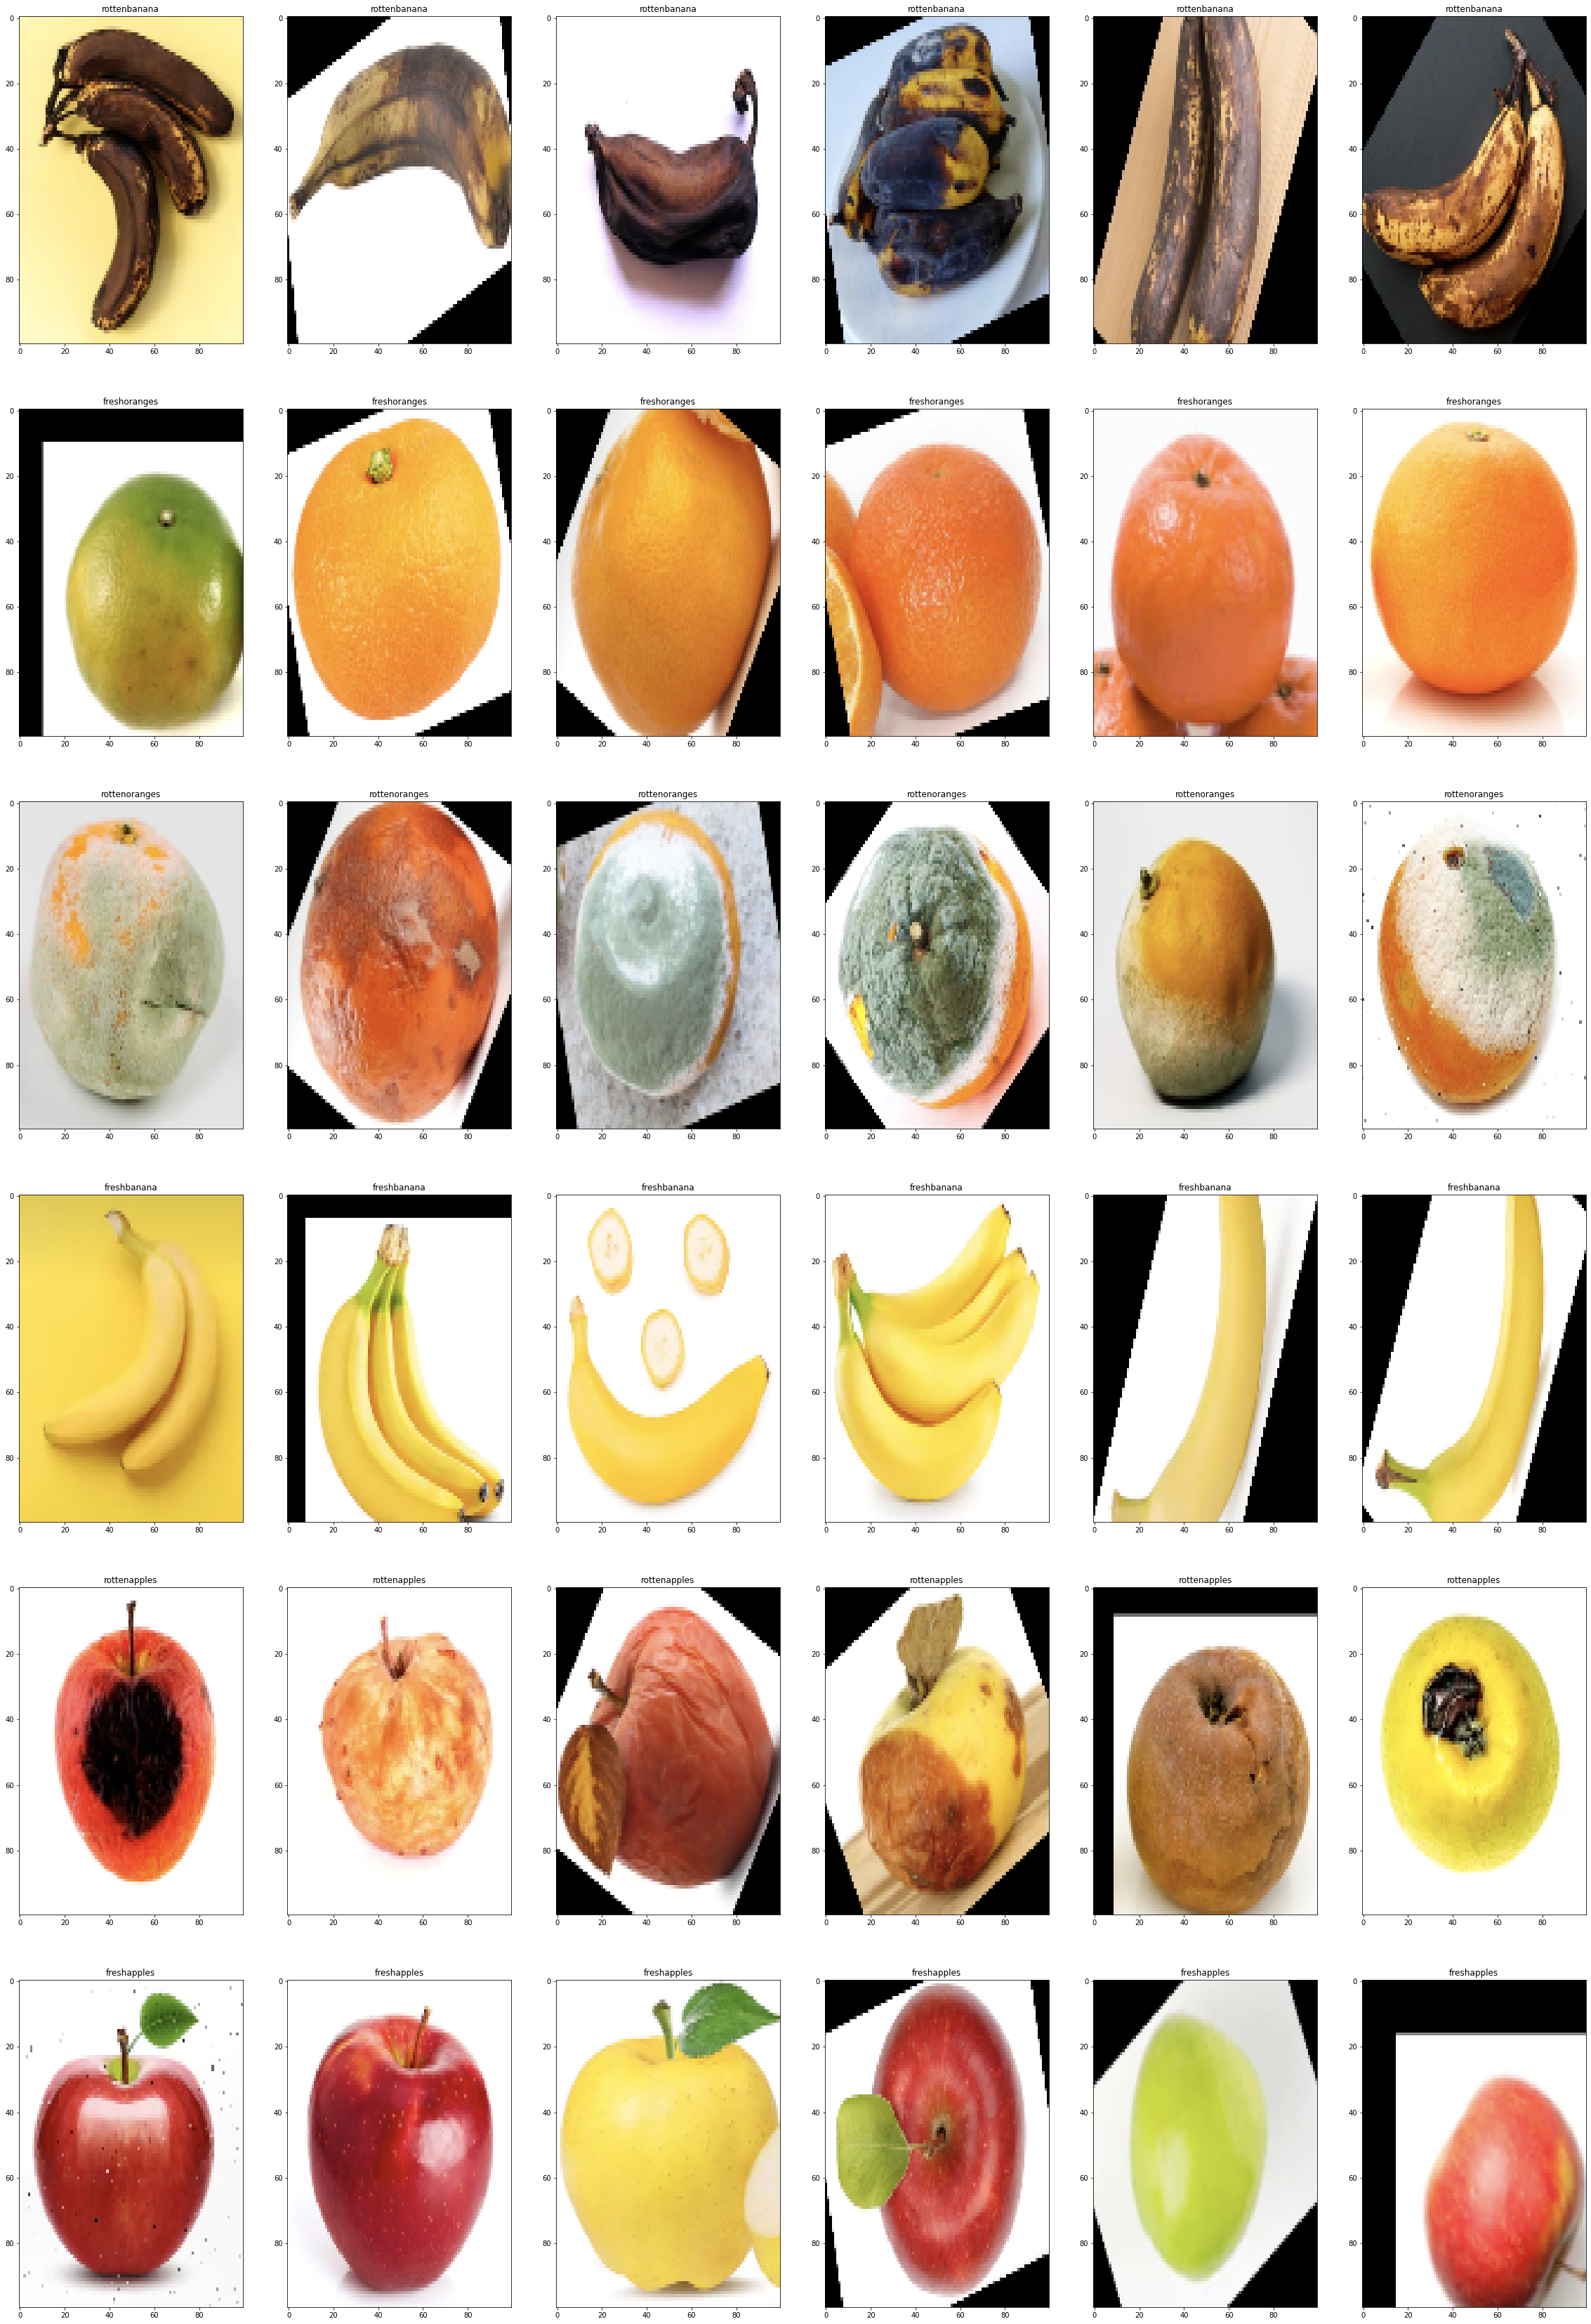

In [6]:
show_subpot(images_arr)

# Displaying the number of images of each class and the classes names

In [7]:
# Train path + Test path
train_dir = '../input/fruits-fresh-and-rotten-for-classification/dataset/train/'
test_dir = '../input/fruits-fresh-and-rotten-for-classification/dataset/test/'

# Train Dataset

train_dir = '../input/fruits-fresh-and-rotten-for-classification/dataset/train/'
#fresh
fresh_apples_train_dir = os.path.join(train_dir, 'freshapples') #'../input/fruits-fresh-and-rotten-for-classification/dataset/train/freshapples/'
fresh_banana_train_dir = os.path.join(train_dir, 'freshbanana')#'../input/fruits-fresh-and-rotten-for-classification/dataset/train/freshbanana/'
fresh_oranges_train_dir = os.path.join(train_dir, 'freshoranges')

#rotten
rotten_apples_train_dir = os.path.join(train_dir, 'rottenapples')
rotten_banana_train_dir = os.path.join(train_dir, 'rottenbanana')
rotten_oranges_train_dir = os.path.join(train_dir, 'rottenoranges')


# Test Dataset
test_dir = '../input/fruits-fresh-and-rotten-for-classification/dataset/test/'
#fresh
fresh_apples_test_dir = os.path.join(test_dir, 'freshapples')
fresh_banana_test_dir = os.path.join(test_dir, 'freshbanana')
fresh_oranges_test_dir = os.path.join(test_dir, 'freshoranges')

#rotten
rotten_apples_test_dir = os.path.join(test_dir, 'rottenapples')
rotten_banana_test_dir = os.path.join(test_dir, 'rottenbanana')
rotten_oranges_test_dir = os.path.join(test_dir, 'rottenoranges')

fresh_apples_train_len=len(os.listdir(fresh_apples_train_dir))
fresh_banana_train_len=len(os.listdir(fresh_banana_train_dir))
fresh_oranges_train_len=len(os.listdir(fresh_oranges_train_dir))
rotten_apples_train_len=len(os.listdir(rotten_apples_train_dir))
rotten_banana_train_len=len(os.listdir(rotten_banana_train_dir))
rotten_oranges_train_len=len(os.listdir(rotten_oranges_train_dir))

# Train Dataset

print("Images of Training Dataset")
print("No. of train fresh apple images : ", fresh_apples_train_len)
print("No. of train fresh banana images : ", fresh_banana_train_len)
print("No. of train fresh orange images : ", fresh_oranges_train_len)
print("No. of train rotten apple images : ", rotten_apples_train_len)
print("No. of train rotten banana images : ", rotten_banana_train_len)
print("No. of train rotten orange images : ", rotten_oranges_train_len)

print(".........................")

# Test Dataset

print("Images of Testing Dataset")
print("No. of test fresh apple images : ", len(os.listdir(fresh_apples_test_dir)))
print("No. of test fresh banana images : ", len(os.listdir(fresh_banana_test_dir)))
print("No. of test fresh orange images : ", len(os.listdir(fresh_oranges_test_dir)))
print("No. of test rotten apple images : ", len(os.listdir(rotten_apples_test_dir)))
print("No. of test rotten banana images : ", len(os.listdir(rotten_banana_test_dir)))
print("No. of test rotten orange images : ", len(os.listdir(rotten_oranges_test_dir)))

# Getting labels of training data
labels = os.listdir('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/train')
print("Classes names:")
print(".......")
labels

Images of Training Dataset
No. of train fresh apple images :  1693
No. of train fresh banana images :  1581
No. of train fresh orange images :  1466
No. of train rotten apple images :  2342
No. of train rotten banana images :  2224
No. of train rotten orange images :  1595
.........................
Images of Testing Dataset
No. of test fresh apple images :  395
No. of test fresh banana images :  381
No. of test fresh orange images :  388
No. of test rotten apple images :  601
No. of test rotten banana images :  530
No. of test rotten orange images :  403
Classes names:
.......


['rottenbanana',
 'freshoranges',
 'rottenoranges',
 'freshbanana',
 'rottenapples',
 'freshapples']

# **Load VGG16 Model with ImageNet weights**
#### And also remove the last layer of the model.

In [44]:
vgg16_model=keras.applications.VGG16(weights='imagenet',input_shape=(150, 150, 3),include_top=False) 
#input_shape=(224,224,3),pictures of dataset are in color so they have three dimensions:height,width,number of channels which are three (red,green,blue)
#include_top=FALSE : bchil ekher tabe2ten mn vgg16 li hiye flatten layer wl output li khasin bl image net laeno ma binesbo l fruit dataset akhadna meno bas l taba2at li bte3mol future extraction
# kl block byehtewe 3a 4 layers la ntale3 l features li mnesbe 

# The 5 blocks of VGG16 Pretrained Model

In [43]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# Adding layers to the pretrained VGG16 model
#### the last dense layer has the same number of neurons of the classes in the dataset.
#### freeze the model with exception of the last two blocks (block4 & block5)


In [45]:
vgg16_model.trainable = True #unfreeze the last 2 blocks

set_trainable = False
for layer in vgg16_model.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        #retrain bcz of the similarity between the rotten orange and apple so 3m n3adel l conv layer la ntale3 l features l khasin b hol l 2
        # jarabna freeze la kl l blocks 3atetna ghalat ben hol l tnen ma 3m ytale3 l features li mnesbin
        #that's why we unfreeze last 2 blocks and train the 2 blocks to find the features for each of the apple and orange
        

In [46]:
# new5_model
# Create inputs with correct shape
inputs = vgg16_model.input #input layer 150 150 3

# Call the VGG16 model
x = vgg16_model(inputs)#, training=False)

# Add flatten layer
x = keras.layers.Flatten()(vgg16_model.output) #output of vgg16 of block5 - last layer in block5

# Add final dense layer with softmax as activation function
x = keras.layers.Dense(32, activation = 'relu')(x) #no need to use softmax laeno ma khalasna ta ne3mol categorize

x = keras.layers.Dense(64, activation = 'relu')(x) #zedna taba2at dense laen l dense betale3lna l features li m3a2adin so la ne2dar nfare2 ben l orange wl apple

#new6_model + new7_model
x = keras.layers.Dense(128, activation = 'relu')(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
#new7_model
#x = keras.layers.Dense(512, activation = 'relu')(x)

# Add final dense layer with softmax as activation function
outputs = keras.layers.Dense(6, activation = 'softmax')(x) #softmax bl output layer

# Combine inputs and outputs to create model
model = keras.Model(inputs=inputs, outputs=outputs)

In [47]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

## Compile Model with categorical_crossentropy as loss function and adam optimizer

In [50]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam') #rmsprop

## Augment the Data using ImageDataGenerator

In [21]:
datagen = ImageDataGenerator( 
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.1,
  horizontal_flip=True,
  vertical_flip=True,
  rescale=1./255,  
  validation_split=0.2,       
#    validation_split : The fraction of images reserved for validation (strictly between 0 and 1). 
#    So if the value of 0.2 is used then 20% samples will be reserved for the validation set and remaining 80% for the training set.                    
  preprocessing_function=keras.applications.vgg16.preprocess_input
  )

#datagen1= ImageDataGenerator(rescale=1./255,validation_split=0.2)
datagen1= ImageDataGenerator(rescale=1./255,
  preprocessing_function=keras.applications.vgg16.preprocess_input)
#test data should not be augmented

## Load Dataset

In [48]:
#train and test dataset paths
train_path='../input/fruits-fresh-and-rotten-for-classification/dataset/train'  
test_path='../input/fruits-fresh-and-rotten-for-classification/dataset/test'

# load and iterate training dataset
train_generator = datagen.flow_from_directory(train_path, 
                                       target_size=[150,150],#[224,224],
                                       #classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
                                       color_mode='rgb', 
                                       class_mode="categorical",
                                       batch_size = 32, 
                                       shuffle=True,
                                       subset='training') 


validation_generator = datagen.flow_from_directory(train_path, 
                                       target_size=[150,150],#[224,224],
                                       #classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenorganges'],
                                       color_mode='rgb', 
                                       class_mode="categorical",
                                       batch_size = 32,
                                       shuffle=True,
                                       subset='validation') 

# load and iterate testing dataset 
test_generator = datagen1.flow_from_directory(test_path, 
                                      target_size=[150,150],#[224,224], 
                                      color_mode='rgb', 
                                      class_mode="categorical",
                                      batch_size = 32) 

Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


## Training the Model with 20 epochs

In [51]:
#6new_model
history = model.fit(train_generator,
          validation_data=validation_generator,
          steps_per_epoch=train_generator.samples/train_generator.batch_size, 
          validation_steps=validation_generator.samples/validation_generator.batch_size, 
          epochs=20)

Epoch 1/20
272/272 [==============================] - 137s 500ms/step - loss: 1.2025 - accuracy: 0.4810 - val_loss: 0.8011 - val_accuracy: 0.7144
Epoch 2/20
272/272 [==============================] - 108s 398ms/step - loss: 0.5698 - accuracy: 0.7535 - val_loss: 0.4736 - val_accuracy: 0.7870
Epoch 3/20
272/272 [==============================] - 107s 394ms/step - loss: 0.5144 - accuracy: 0.7823 - val_loss: 0.4878 - val_accuracy: 0.8251
Epoch 4/20
272/272 [==============================] - 108s 395ms/step - loss: 0.4203 - accuracy: 0.8489 - val_loss: 0.4095 - val_accuracy: 0.8742
Epoch 5/20
272/272 [==============================] - 108s 395ms/step - loss: 0.3115 - accuracy: 0.8950 - val_loss: 0.2523 - val_accuracy: 0.9224
Epoch 6/20
272/272 [==============================] - 108s 395ms/step - loss: 0.2775 - accuracy: 0.9121 - val_loss: 0.2052 - val_accuracy: 0.9229
Epoch 7/20
272/272 [==============================] - 108s 397ms/step - loss: 0.2783 - accuracy: 0.9217 - val_loss: 0.1755 -

# Evaluating the model on the testing dataset

In [52]:
result=model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size)
print(result)
print('Error on testing dataset: ', result[0])
print('Accuracy on testing dataset: ', result[1])

84/84 [==============================] - 17s 201ms/step - loss: 0.1835 - accuracy: 0.9337
[0.18349578976631165, 0.9336545467376709]
Error on testing dataset:  0.18349578976631165
Accuracy on testing dataset:  0.9336545467376709


# Plotting Training and Validation **Accuracy**

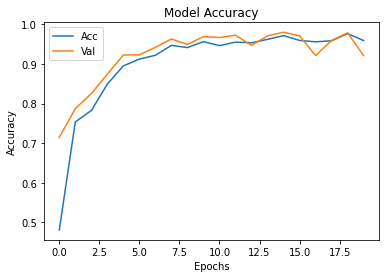

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'upper left')

# Plotting Training and Validation **Error**

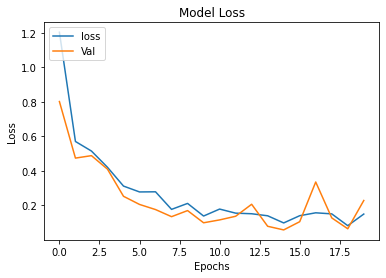

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

## Saving the model

In [56]:
model.save('/kaggle/working/rottenvsfresh_model.h5')

## Loading the model

In [9]:
from keras.models import load_model
model1=load_model('../input/rottenvsfresh-fruits-model/rottenvsfresh_new6_model.h5')

# Testing the final model on a new photo from the testing dataset

the path of the photo is  ../input/fruits-fresh-and-rotten-for-classification/dataset/test/rottenapples/saltandpepper_Screen Shot 2018-06-07 at 2.53.57 PM.png
class predicted by the model [[0. 0. 0. 1. 0. 0.]]
The name of the predicted class: rotten apple


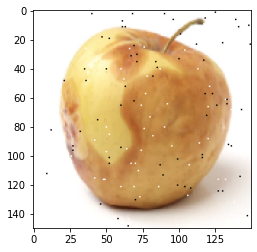

In [26]:
names = [fresh_apples_test_dir,
         fresh_banana_test_dir,
         fresh_oranges_test_dir,
         rotten_apples_test_dir,
         rotten_banana_test_dir,
         rotten_oranges_test_dir
]
name_rand = random.choice(names)
filename = os.listdir(name_rand)
sample = random.choice(filename)
fn = os.path.join(name_rand,sample)
print("the path of the photo is ",fn)


img = load_img(fn, target_size=(150, 150))
plt.imshow(img)


x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model1.predict(images, batch_size=32)
print("class predicted by the model",classes)


prediction = ''

if classes[0][0]==1:
    prediction = 'fresh apple'
elif classes[0][1]==1:
    prediction = 'fresh banana'
elif classes[0][2]==1:
    prediction = 'fresh orange'
elif classes[0][3]==1:
    prediction = 'rotten apple'
elif classes[0][4]==1:
    prediction = 'rotten banana'
elif classes[0][5]==1:
    prediction = 'rotten orange'

print("The name of the predicted class:",prediction)